In [ ]:
!pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 64.8 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Cargar el modelo preentrenado (YOLOv8n = nano, rápido y liviano; también está disponible yolov8s, yolov8m, etc.)
model = YOLO('yolov8n.pt')

# Deteccion de objetos propios


## Paso 1: Instalación y configuración del entorno

Primero, instalamos la librería `ultralytics` que contiene la implementación de YOLOv8. También importamos las librerías necesarias.

In [ ]:
# Instalamos la librería de Ultralytics
!pip install ultralytics


In [ ]:
# Importamos la clase YOLO
from ultralytics import YOLO
import os
from IPython.display import Image

## Paso 2: Preparación del Set de Datos

Para que YOLO pueda usar nuestros datos, necesitamos una estructura de carpetas específica y un archivo de configuración `.yaml`.

**Estructura de Carpetas:**
Debemos crear una carpeta `datasets` y dentro de ella, la carpeta del  proyecto (ej. `dataset_vehiculos`). La estructura interna debe ser:
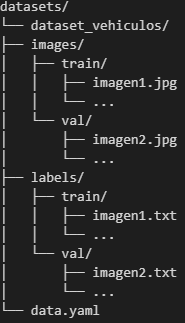


**Archivo `data.yaml`:**
Este archivo le dice a YOLO dónde encontrar las imágenes y cuáles son las clases de objetos.

A continuación, simularemos la creación de esta estructura. Primero, sube tu archivo `.zip` con las imágenes y etiquetas a la sesión.

In [ ]:
# Creamos la carpeta principal para los datasets
os.makedirs('datasets', exist_ok=True)



In [ ]:
# ---- IMPORTANTE ----
# En este punto, se debe arrastrar y soltar el archivo .zip
# (ej. 'dataset_vehiculos.zip') en el explorador de archivos
# de Google Colab, dentro de la carpeta 'datasets'.

# Descomprimimos el archivo (ajustar el nombre del archivo si es necesario)
!unzip /content/DATACOLOR.zip -d mi_dataset/

Streaming output truncated to the last 5000 lines.
 extracting: mi_dataset/train/images/IMG-20250902-WA0082_jpg.rf.77bf95873459309153876c0301e1f3ca.jpg  
 extracting: mi_dataset/train/images/IMG-20250902-WA0085_jpg.rf.5f58e3e123be957cf000ab73b2044951.jpg  
 extracting: mi_dataset/train/images/IMG-20250902-WA0085_jpg.rf.d8aa0e1b518e26125bc359887554893f.jpg  
 extracting: mi_dataset/train/images/IMG-20250902-WA0085_jpg.rf.ee470349aee506a9647e2af47314cac9.jpg  
 extracting: mi_dataset/train/images/IMG-20250902-WA0086_jpg.rf.3a0ee507b097c79b97536ceb2657f07b.jpg  
 extracting: mi_dataset/train/images/IMG-20250902-WA0086_jpg.rf.3dcda338e39051664daec2622808a154.jpg  
 extracting: mi_dataset/train/images/IMG-20250902-WA0086_jpg.rf.4d393379ce1371f68bc4e22343072373.jpg  
 extracting: mi_dataset/train/images/IMG-20250902-WA0088_jpg.rf.21691d47c19db5fa947d07f2ac366a36.jpg  
 extracting: mi_dataset/train/images/IMG-20250902-WA0088_jpg.rf.23a24ea0de95ab2de972ab95686b0629.jpg  
 extracting: mi_datase

In [ ]:
# Creamos el archivo data.yaml usando %%writefile
# Ajusta las rutas y los nombres de las clases según tu proyecto
%%writefile mi_dataset/data.yaml
train: ../train/images
val: ../valid/images
test: ../test/images

nc: 9
names: ['A', 'B', 'C', 'COCO', 'DINO', 'HIPO', 'Hongo', 'PATO', 'UNI']

roboflow:
  workspace: va-e0yqn
  project: deteccion-de-figuras-impresas-3d-svghb
  version: 8
  license: CC BY 4.0
  url: https://universe.roboflow.com/va-e0yqn/deteccion-de-figuras-impresas-3d-svghb/dataset/8

Overwriting mi_dataset/data.yaml


## Paso 3: Entrenamiento del Modelo (Fine-Tuning)

Ahora vamos a cargar un modelo YOLOv8 pre-entrenado y lo afinaremos con nuestro set de datos. Usaremos el modelo más pequeño (`yolov8n.pt`) para un entrenamiento rápido.

In [ ]:
# Cargamos un modelo pre-entrenado (ej. yolov8n.pt para nano)
model = YOLO('yolov8n.pt')

# Entrenamos el modelo con nuestros datos
# El entrenamiento puede tardar varios minutos dependiendo del hardware y el tamaño del dataset
results = model.train(
   data='mi_dataset/data.yaml',
   epochs=150,  # Un número mayor de épocas suele dar mejores resultados
   imgsz=640,  # Tamaño de imagen, 640 es común para YOLOv8
   plots=True  # Para que genere gráficos de los resultados
)

Ultralytics 8.3.200 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=mi_dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, p

## Paso 4: Evaluación de Resultados

Una vez finalizado el entrenamiento, la librería `ultralytics` crea una carpeta llamada `runs` donde guarda toda la información. Los pesos del mejor modelo se guardan en `runs/detect/train/weights/best.pt`.

También se generan gráficos de rendimiento, como la curva de pérdidas y las métricas mAP. Podemos visualizarlos para evaluar el desempeño.

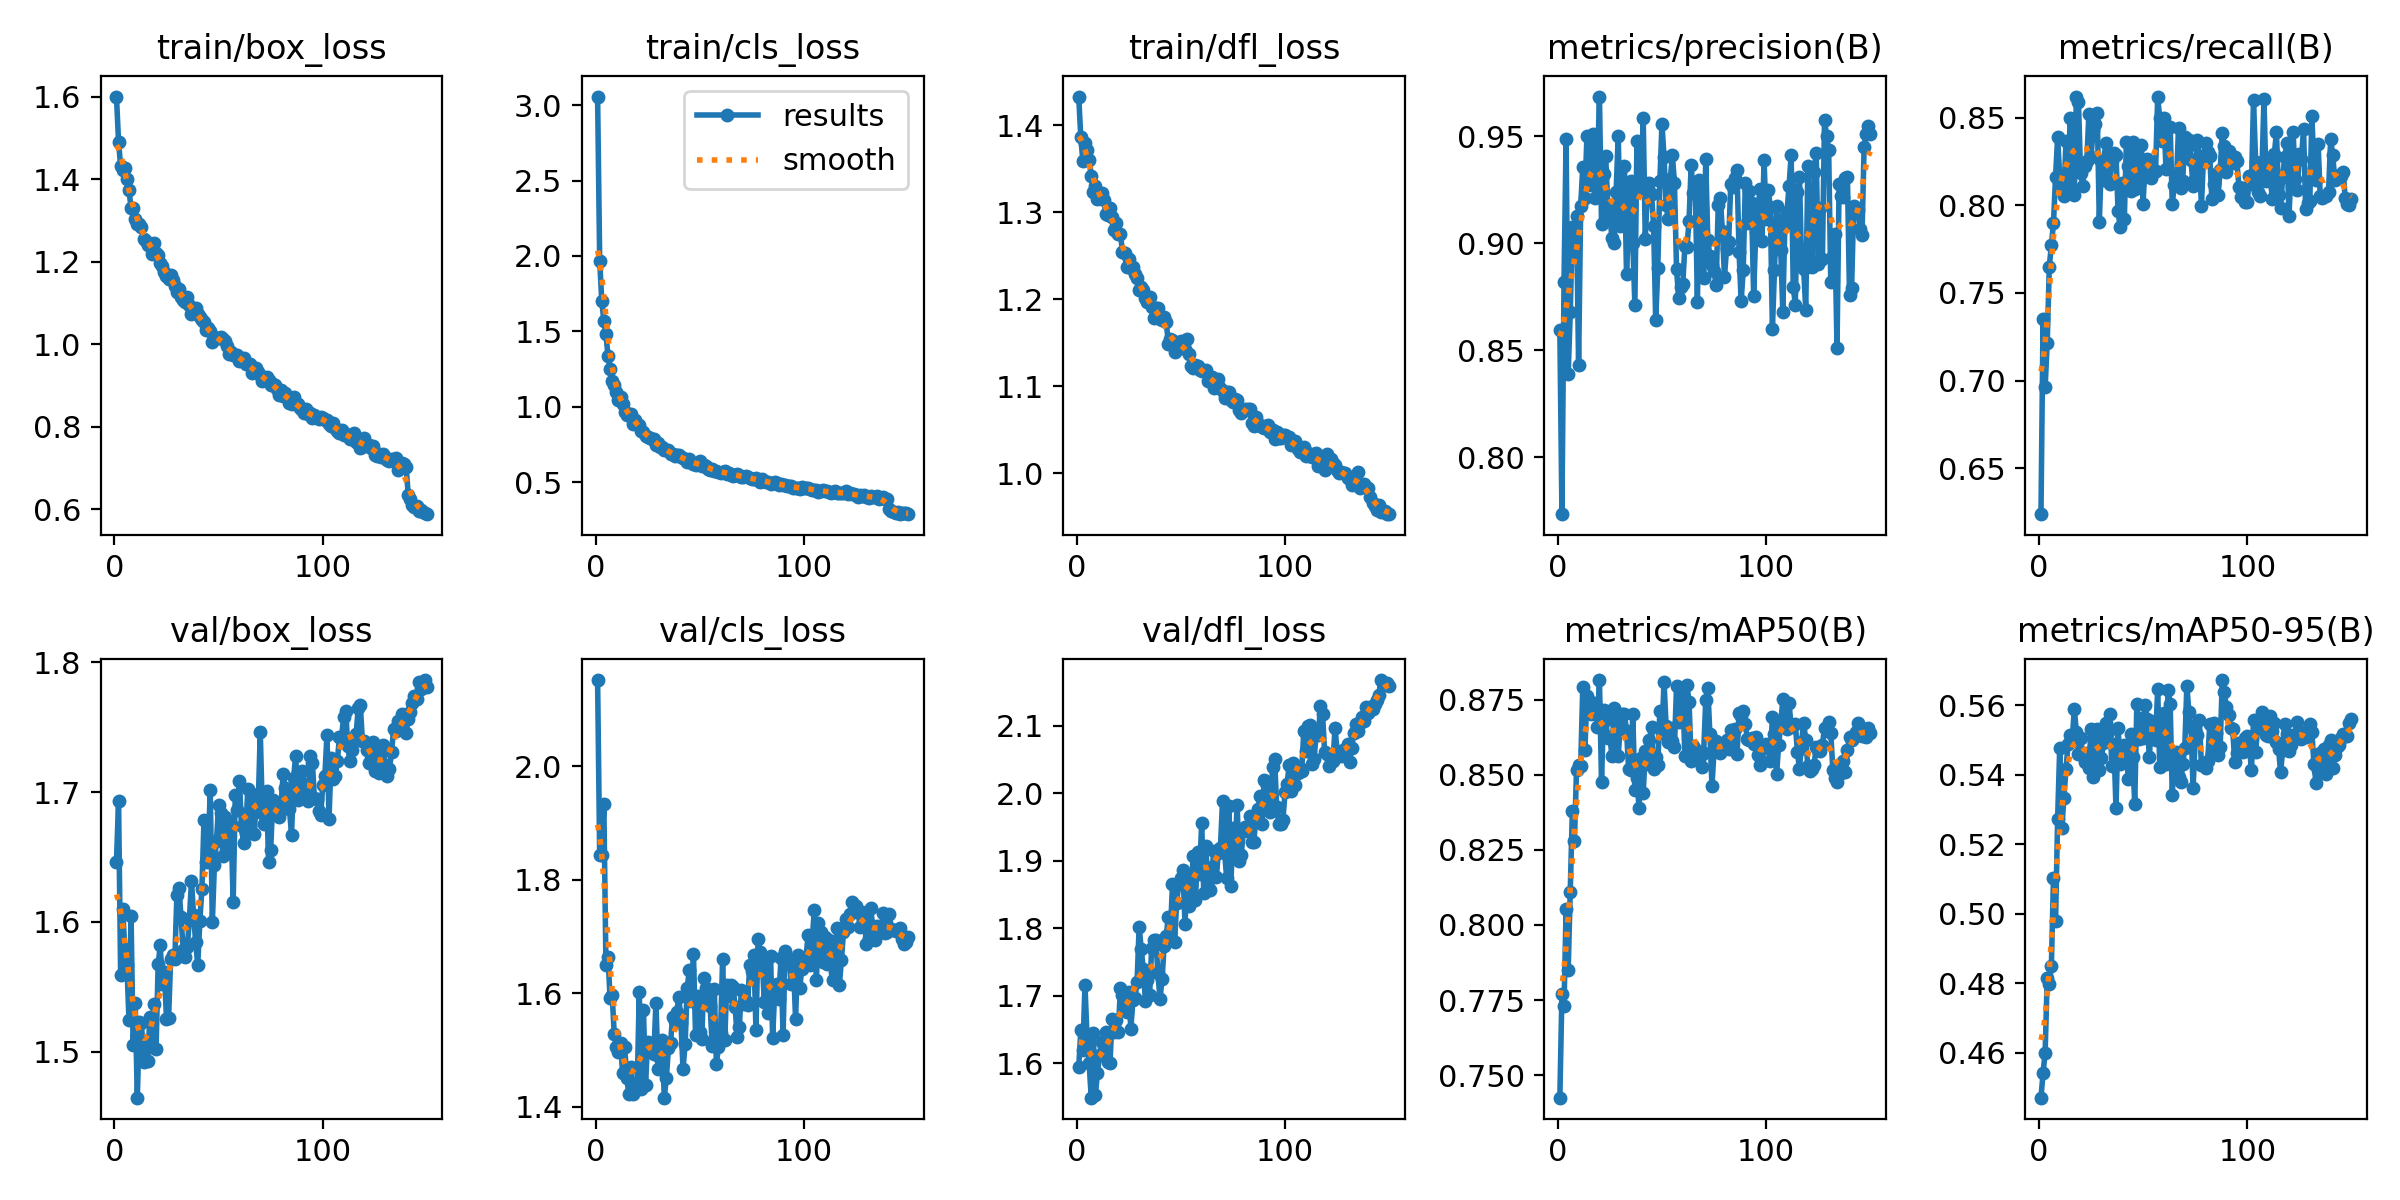

In [ ]:
# Mostramos la imagen con los resultados del entrenamiento
# La ruta puede variar ligeramente si se ejecuta el entrenamiento varias veces (train, train2, etc.)
Image(filename='runs/detect/train3/results.png', width=800)

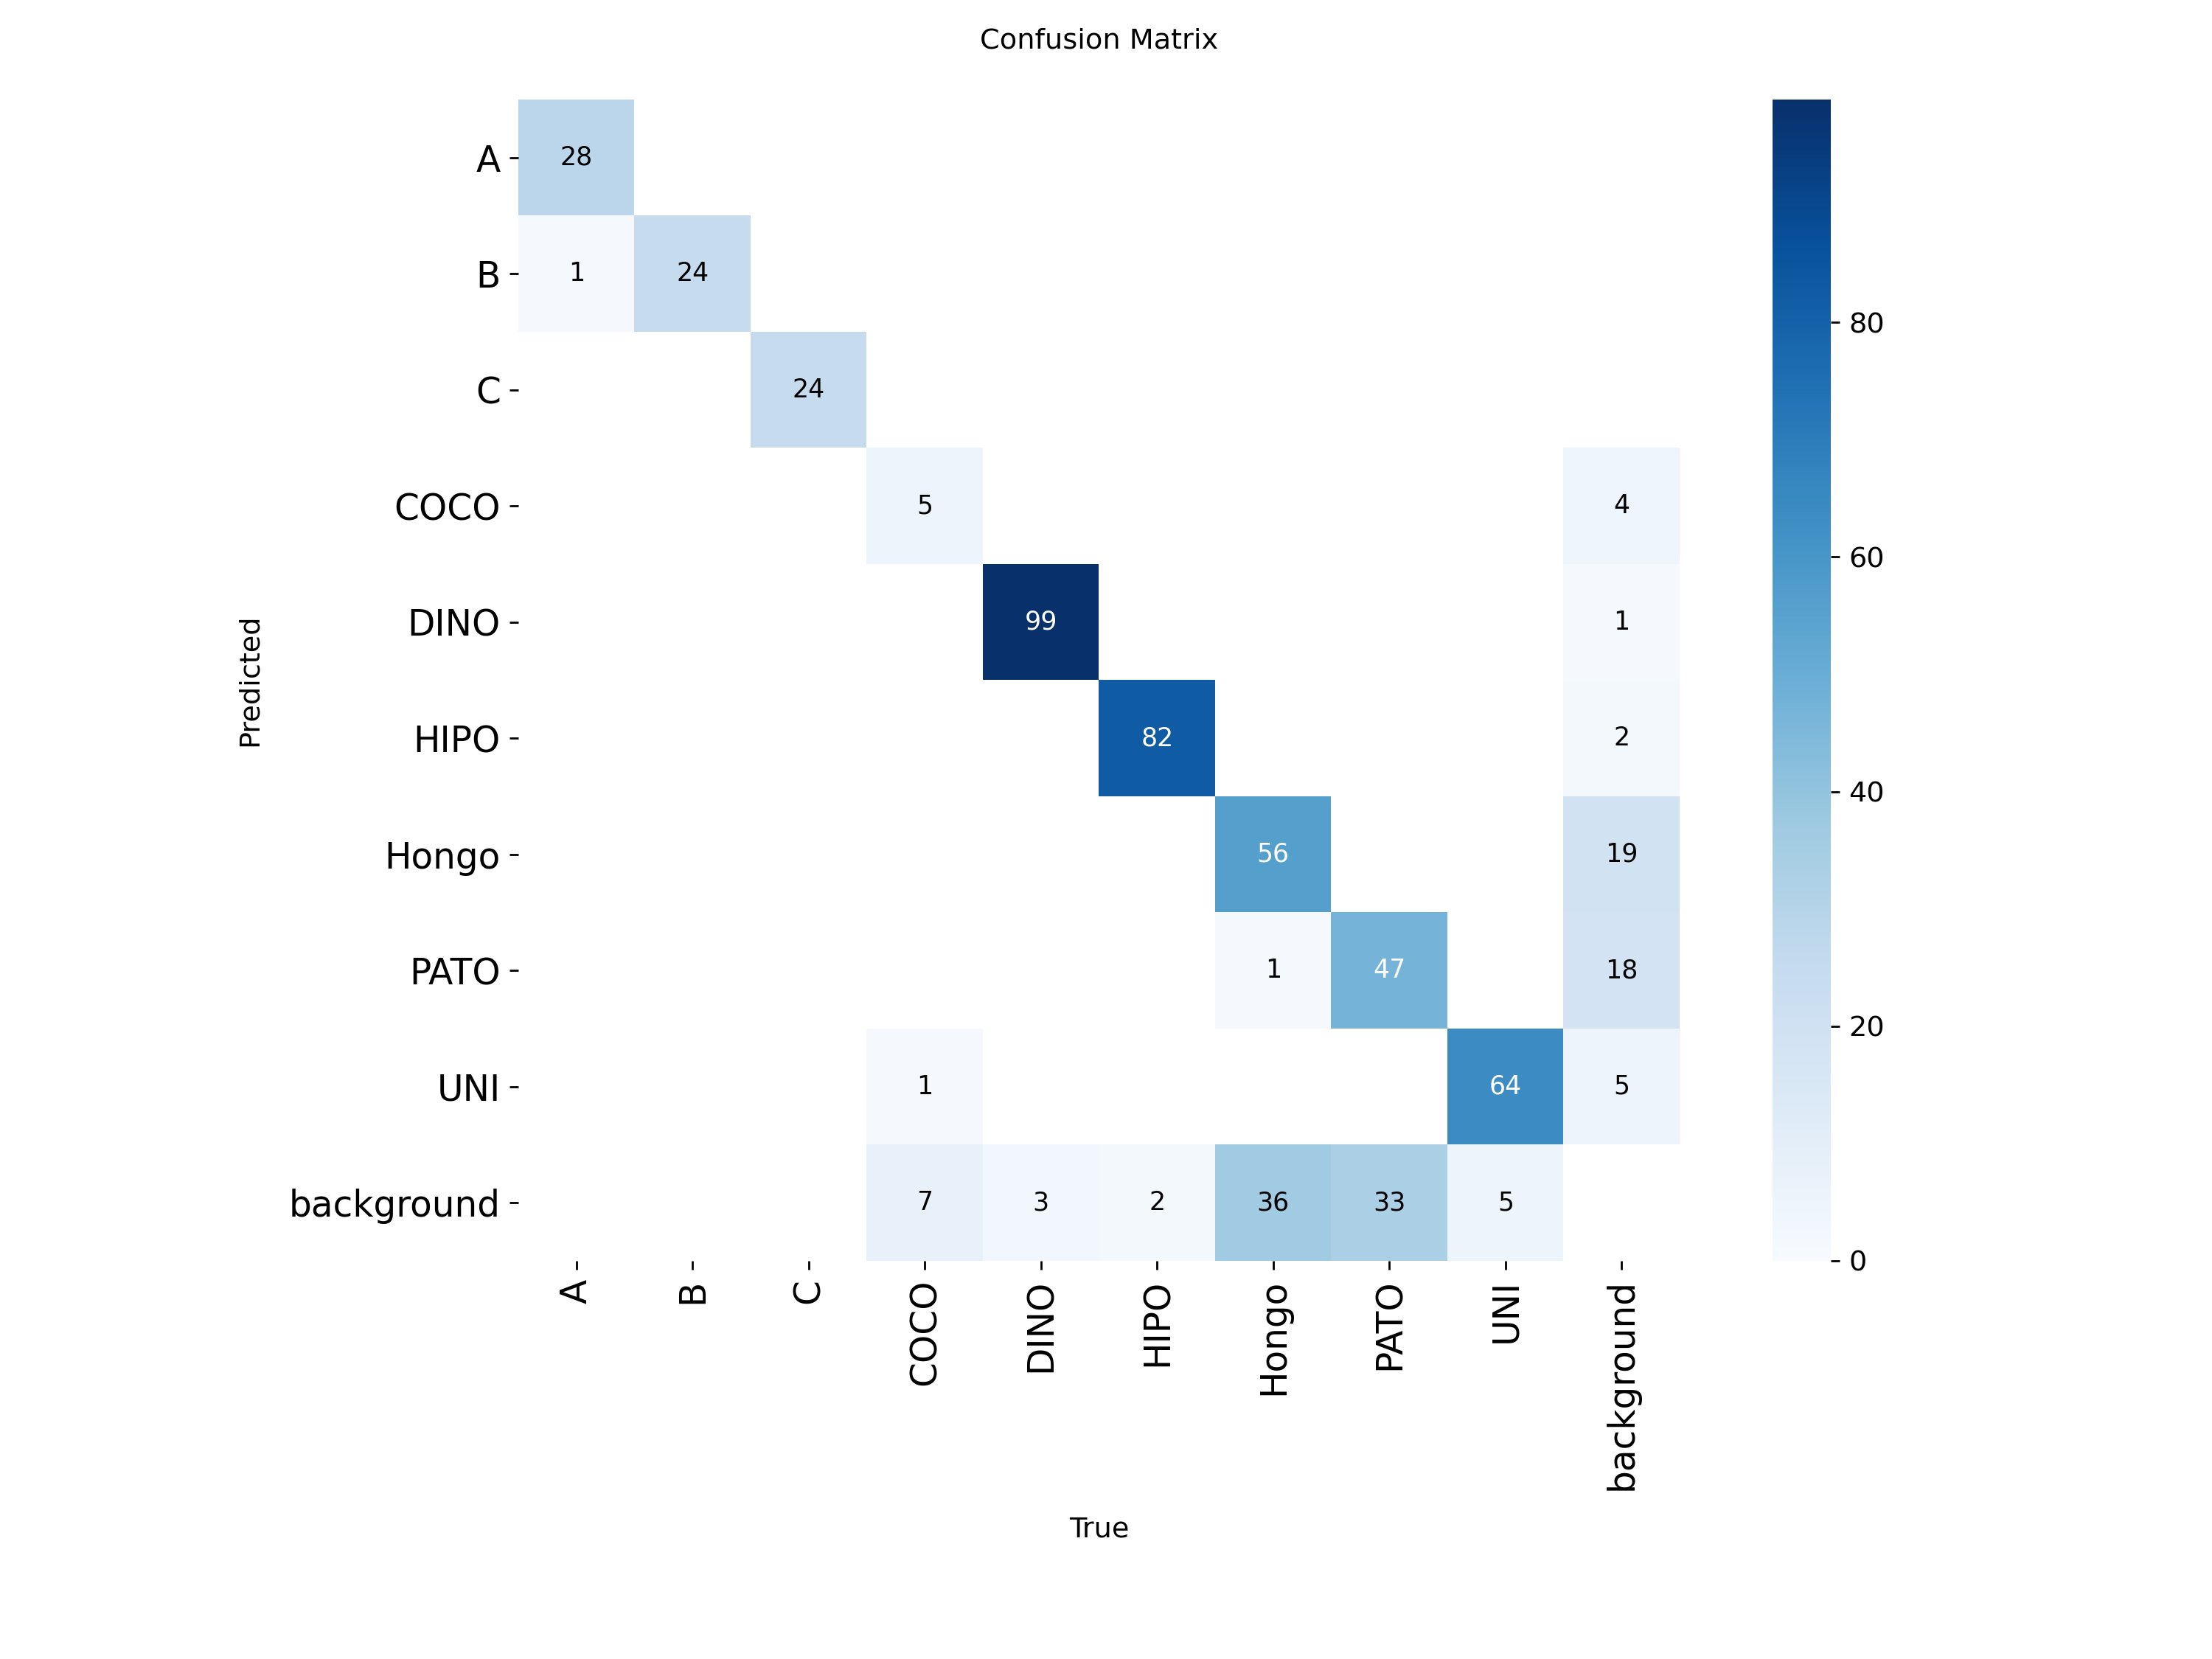

In [ ]:
# Mostramos la matriz de confusión
Image(filename='runs/detect/train3/confusion_matrix.png', width=600)

## Paso 5: Realizar Predicciones con el Modelo Afinado

Finalmente, usamos los pesos de nuestro modelo afinado (`best.pt`) para detectar objetos en imágenes nuevas que el modelo no ha visto durante el entrenamiento.

In [ ]:
# Cargamos nuestro modelo afinado
model_finetuned = YOLO('runs/detect/train3/weights/best.pt')

# ---- IMPORTANTE ----
# Subir una imagen de prueba a la carpeta principal de Colab para hacer la predicción.
# Reemplaza 'imagen_prueba.jpg' con el nombre de tu imagen.

# Realizamos la predicción en una imagen de prueba
results = model_finetuned.predict('prueba.png')

# El resultado es una lista, tomamos el primer elemento
result = results[0]

# Mostramos la imagen con las detecciones
result.show()

# También podemos guardar la imagen con las detecciones
# result.save(filename='resultado_prediccion.jpg')

In [ ]:
# 1. Comprimir la carpeta en un archivo .zip
!zip -r tallercolab.zip /content/runs

# 2. Descargar el archivo comprimido
from google.colab import files
files.download("tallercolab.zip")


  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/train2/ (stored 0%)
  adding: content/runs/detect/train2/weights/ (stored 0%)
  adding: content/runs/detect/train2/args.yaml (deflated 53%)
  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/weights/ (stored 0%)
  adding: content/runs/detect/train/args.yaml (deflated 53%)
  adding: content/runs/detect/train3/ (stored 0%)
  adding: content/runs/detect/train3/train_batch20440.jpg (deflated 6%)
  adding: content/runs/detect/train3/train_batch2.jpg (deflated 4%)
  adding: content/runs/detect/train3/labels.jpg (deflated 32%)
  adding: content/runs/detect/train3/results.csv (deflated 62%)
  adding: content/runs/detect/train3/BoxF1_curve.png (deflated 8%)
  adding: content/runs/detect/train3/val_batch0_labels.jpg (deflated 8%)
  adding: content/runs/detect/train3/val_batch2_labels.jpg (deflated 9%)
  adding: content/runs/detect/train3/train_batch20441.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download("/content/runs/detect/train3/weights/best.pt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>